In [2]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import math

#### Hypothesis testing for difference of two means (variances unknown, but assumed to be equal)

The data (refering to table below : courses, and exams / courses with exam) is independent to each other. The data indeed have a lot of similarities and common parts, which allow us to assume, that variances may be equal. This assumption will have inpact on choosing proper method of testing.

In [21]:
data = pd.read_csv(r'C:\Users\DELL\Desktop\moje projekty\tableau\Udemy Courses\transformed data\hypothesis testing data.csv')
data

,num_published_lectures,num_published_practice_tests,avg_rating
0,8,0,4.21642
1,91,0,3.90000
2,6,0,3.85294
3,26,0,4.42857
4,104,0,4.10000
...,...,...,...
9442,122,1,4.52778
9443,17,0,5.00000
9444,5,0,4.85714
9445,85,0,4.87500


Let's split the data between courses, and exams / courses ending with exams:

In [24]:
data_exams = data[data['num_published_practice_tests']> 0]
data_courses = data[data['num_published_practice_tests']== 0]

<span style='color:Blue'>Hipothesis:</span>
- H0 - Average rating of courses, and exams / courses with exams are not significantly different.
- H1 - There is significant difference between average rating of courses, and exams / courses with exams (average rating of the course is bigger than exam rating).

Basing on the data, we will need to calculate T-statistic and pooled variance for both samples to make any conclusion.

We will need the equation<br><br>
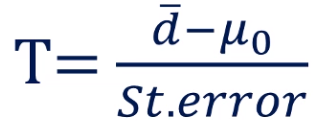<br><br>
The d is difference between means of both samples.
Standard error need to be calculated with equation:<br><br>
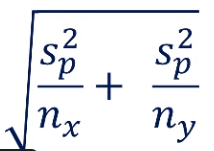<br><br>
and pooled variance formula is:<br><br>
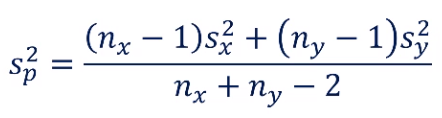


In [30]:
pooled_var = ((len(data_exams)-1)*data_exams['avg_rating'].std()**2+     
                 (len(data_courses)-1)*data_courses['avg_rating'].std()**2)/(len(data_exams)+len(data_courses)-2)
print(f'Pooled variance is {pooled_var}.')

Pooled variance is 0.20522476985103674.


In [31]:
std_err = math.sqrt((pooled_var/len(data_exams))+
                       (pooled_var/len(data_courses)))
print(f'Standard error is {std_err}.')

Standard error is 0.0229282850101527.


In [35]:
means_diff = data_courses['avg_rating'].mean()-data_exams['avg_rating'].mean()   
T_stat = (means_diff - 0)/std_err

print(f'T-statistic for the test is equal to {T_stat}.')

T-statistic for the test is equal to 4.951997154181998.


According to the adopted rules in statistics, if the T-statistic is over 4.0, the H0 need to be rejected. That means, there is significant difference between average ratings of both categories: courses with exam / exams, and courses without. <br><br>
<span style='color:Green'>Conclusion :</span> Courses without exams have statistically significant better ratings.